In [1]:
# code replicated from https://github.com/charleywu/graphInference/blob/master/analyses/PXP.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from bms import GroupBMC #https://github.com/cpilab/group-bayesian-model-comparison

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Protected exceedance probability 

#### Group rounds

In [2]:
#Load data
m = -pd.read_csv('Stanfits/IndividualWAICPlus.csv', sep=',').iloc[:, 1:].to_numpy().T
#Negative sign is because we are switching from loss to evidence

In [3]:
#compute pxp
result = GroupBMC(m).get_result().protected_exceedance_probability
result =  result.reshape(1, result.shape[0]) #reshape from column vector to row vector
#Save
np.savetxt('data/modelComparison/PXP.csv', result, delimiter=',')

In [4]:
result
#"Asocial"       "Unbiased"    "Success-based" "Unique"

array([[1.10755194e-32, 1.09904572e-32, 1.09270030e-32, 1.92056110e-19,
        3.64179281e-14, 1.09292837e-32, 4.14497054e-25, 1.00000000e+00]])

In [5]:
d = {'pxp': result.tolist()[0], 'model': ["Asocial", "Unbiased","Success-based","Unique", "ARS", "Critical", "Conditional", "ARS+Cond"]}
df = pd.DataFrame(data=d)

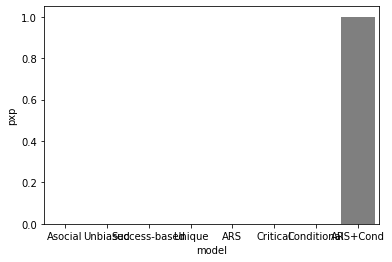

In [6]:
sns.barplot(data=df, x="model", y="pxp")

#### Solo rounds

In [2]:
#Load data
m = -pd.read_csv('Stanfits/SoloWAIC.csv', sep=',').iloc[:, 1:].to_numpy().T
#Negative sign is because we are switching from loss to evidence



In [3]:
#compute pxp
result = GroupBMC(m).get_result().protected_exceedance_probability
result =  result.reshape(1, result.shape[0]) #reshape from column vector to row vector
#Save
np.savetxt('data/modelComparison/PXPsolo.csv', result, delimiter=',')


In [4]:
result


array([[2.44149451e-11, 1.00000000e+00]])

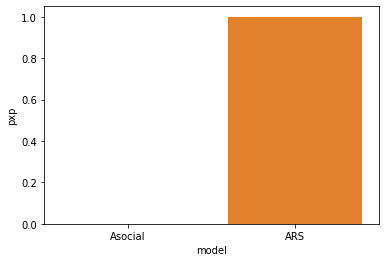

In [5]:
d = {'pxp': result.tolist()[0], 'model': ["Asocial", "ARS"]}
df = pd.DataFrame(data=d)

sns.barplot(data=df, x="model", y="pxp")